In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches


In [4]:
seasonsStats = pd.read_csv('DATA/nba-players-data/all_seasons.csv')
players = pd.read_csv('DATA/nba-players-stats/Players.csv')
playersData = pd.read_csv('DATA/nba-players-stats/player_data.csv')
nbaPlayersStats = pd.read_csv('DATA/nba-players-stats/seasons_stats.csv')

In [34]:
rp = playersData.rename(columns={"name": "Player"})
result = pd.merge(players, rp, on='Player')
result = result.drop(columns=['collage', 'height_y', 'weight_y'])
result = result.rename(columns={'height_x': 'height', 'weight_x': 'weight'})
result= result.drop(columns=['Unnamed: 0'])

KeyError: "labels ['collage' 'height_y' 'weight_y'] not contained in axis"

In [45]:
result.to_csv('PlayersAndPlayersData.csv')

In [44]:
result

,Player,height,weight,born,birth_city,birth_state,year_start,year_end,position,birth_date,college
0,Curly Armstrong,180.0,77.0,1918.0,NaN,NaN,1949,1951,G-F,"November 1, 1918",Indiana University
1,Cliff Barker,188.0,83.0,1921.0,Yorktown,Indiana,1950,1952,G,"January 15, 1921",University of Kentucky
2,Leo Barnhorst,193.0,86.0,1924.0,NaN,NaN,1950,1954,F-G,"May 11, 1924",University of Notre Dame
3,Ed Bartels,196.0,88.0,1925.0,NaN,NaN,1950,1951,F,"October 8, 1925",North Carolina State University
4,Ralph Beard,178.0,79.0,1927.0,Hardinsburg,Kentucky,1950,1951,G,"December 2, 1927",University of Kentucky
5,Gene Berce,180.0,79.0,1926.0,NaN,NaN,1950,1950,G-F,"November 22, 1926",Marquette University
6,Charlie Black,196.0,90.0,1921.0,Arco,Idaho,1949,1952,F-C,"June 15, 1921",University of Kansas
7,Nelson Bobb,183.0,77.0,1924.0,Philadelphia,Pennsylvania,1950,1953,G,"February 25, 1924",Temple University
8,Jake Bornheimer,196.0,90.0,1927.0,New Brunswick,New Jersey,1949,1950,F-C,"June 29, 1927",Muhlenberg College
9,Vince Boryla,196.0,95.0,1927.0,East Chicago,Indiana,1950,1954,F,"March 11, 1927",University of Denver


# Dataset infos

In [403]:
Players = set()
for index, row in nbaPlayersStats.iterrows():
    Players.add(row['Player'])
numberOfPlayers  = len(Players)

print("# Players in Database: ",numberOfPlayers )
print("Data covers years:  1950-2017")

# Players in Database:  3922
Data covers years:  1950-2017


In [47]:
nbaPlayersStats

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [46]:
seasonsStats

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
7,7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990,1,...,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97
8,8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992,Undrafted,...,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97
9,9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991,2,...,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-97


# Drafted player height mean / year

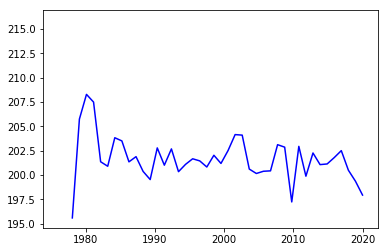

In [368]:
def meanHeightDrafted(year):
    draftedIn = table['draft_year'] == str(year)
    mean = table.loc[draftedIn, 'player_height'].mean()
    return mean
lin = np.linspace(1975, 2020, 45)
heights = [meanHeightDrafted(i) for i in range(1975, 2020)]
plt.plot(lin, heights, 'b')


In [369]:
plt.show()

# 3pts succeeded shot / year

In [370]:
lin = np.linspace(1980, 2018, 38)


In [371]:
def pts3(year):
    year = nbaPlayersStats['Year'] == year
    sum3pts = nbaPlayersStats.loc[year, '3P'].sum()
    return sum3pts

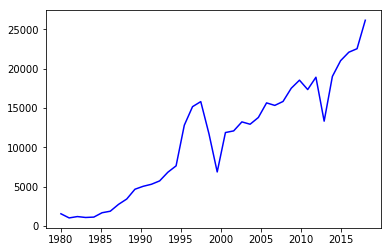

In [372]:
n3pts = [pts3(i) for i in range(1980, 2018)]
plt.plot(lin, n3pts, 'b')

# Dwyane Wade / Kobe Bryant  2pts over the years

In [380]:
def dW(year, player):
    dw = nbaPlayersStats[(nbaPlayersStats['Player']==player)&  (nbaPlayersStats['Year']==year)]    
    try:
        sum2pts = dw['2P'].values[0]
    except: 
        return 0
    return sum2pts

<function matplotlib.pyplot.show(*args, **kw)>

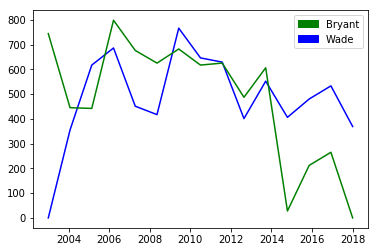

In [407]:
lin = np.linspace(2003,2018, 15)
KB2pts = [dW(i, "Kobe Bryant") for i in range(2003,2018)]
dW2pts = [dW(i, "Dwyane Wade") for i in range(2003,2018)]

plt.plot(lin, dW2pts, 'b')
plt.plot(lin, KB2pts, 'g')

bryantPatch = mpatches.Patch(color='green', label='Bryant')
wadePatch = mpatches.Patch(color='blue', label='Wade')
plt.legend(handles=[bryantPatch,wadePatch ])

plt.show